# Классификация покемонов



## Постановка задачи

Покемоны - широко известная медиафраншиза, существующая напротяжении уже более 25 лет и занимающая особое месо в сердцах не одного поколения. 

В используемом наборе данных содержится информация о 801 покемоне. 
Он включает в себя следующие характеристики:  
**name**: английское имя покемона  
**japanese_name**: оригинальное японское имя покемона  
**pokedex_number**: номер записи покемона в официальном кодексе  
**percentage_male**: процент представителей особей мужского пола  
**type1**: основной тип покемона  
**type2**: подтип покемона   
**classification**: классификация  
**height_m**: высота покемона в метрах  
**weight_kg**: вес покемона в килограммах   
**capture_rate**: скорость захвата покемона   
**base_egg_steps**: количесво шагов, необходимых для вылупления яйца покемона   
**abilities**: строковый список способностей покемона   
**experience_growth**: скорость роста опыта покемона     
**base_happiness**: начальная ценность покемона    
**against_?**: количество урона, полученного от атаки определенного типа (в реальности это 18 колонок, где в каждой прописан урон от определенной атаки)    
**hp**: здоровье покемона   
**attack**: урон от базовой атаки покемона  
**defense**: уровень базовой защиты покемона  
**sp_attack**: урон от специальной атаки покемона    
**sp_defense**: уровень особой защиты покемона  
**speed**: скорость покемона  
**generation**: поколение, в котором впервые был представлен покемон  
**is_legendary**: является ли покемон легендарным 

Исходя из представленных данных, поставим задачу бинарной классификации на легендарных и нелегендарных покемонов (и возможен ли в принципе такой классификатор).


## Данные

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np             
import sklearn  

Загрузим данные и рассмотрим их более подробно.

In [3]:
data = pd.read_csv("pokemon.csv")

Для наглядности выведем несколько строчек данных

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


Размеры таблицы

In [5]:
data.shape

(801, 41)

Выведем информацию о датасете. 

In [6]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


## Обработка пропущеннных значений

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

В первой колонке числятся названия характеристик, далее - количество не нулевых признаков и их тип. Как видно, датасет имеет пропущенные значения. Рассмотрим подробнее.

In [8]:
data.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


Пропущенные значения имеют признаки:   
    height_m - числовой признак   
    percentage_male - числовой признак   
    type2 - категориальный признак   
    weight_kg - числовой признак   
Пропущенные значения числовых признаков заменим медианой, а категориальных - модой.

In [9]:
data['type2'].fillna(data['type2'].mode().iloc[0], inplace=True)
data.isna().sum()

abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m             20
hp                    0
japanese_name         0
name                  0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64

In [10]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [11]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.159800,68.958801,54.524969,401.000000,71.305868,70.911361,66.334582,60.527216,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.067044,26.576015,19.055207,231.373075,32.353826,27.942501,28.907662,108.110181,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.300000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,61.500000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


## Типы признаков

Типы признаков:   
**percentage_male** - числовой   
**type1** - категориальный  
**type2** - категориальный   
**height_m** - числовой  
**weight_kg** - числовой      
**baseeggsteps** - числовой     
**experience_growth** - числовой     
**base_happiness** - числовой    
**against_?** - все 18 признаков являются числовыми   
**hp** - числовой   
**attack** - числовой  
**defense** - числовой  
**sp_attack** - числовой    
**sp_defense** - числовой  
**speed** - числовой       
**is_legendary** - бинарный (целевой класс)

Остальные признаки уберем из датасета, так как нет смысла рассматривать, например, имена как реальную харакеристику.

In [12]:
del data['name']
del data['japanese_name']
del data['abilities']
del data['pokedex_number']
del data['generation']
del data['classfication']
del data['capture_rate']

In [13]:
data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,49,1059860,0.7,45,88.1,65,65,45,grass,poison,6.9,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,63,1059860,1.0,60,88.1,80,80,60,grass,poison,13.0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,123,1059860,2.0,80,88.1,122,120,80,grass,poison,100.0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,43,1059860,0.6,39,88.1,60,50,65,fire,flying,8.5,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,58,1059860,1.1,58,88.1,80,65,80,fire,flying,19.0,0


## Описательная статистика

In [14]:
data.corr()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,is_legendary
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,-0.186841,0.148176,0.215589,0.354255,-0.463272,-0.210522,0.055504,-0.254732,-0.054175,0.062133,0.009994,-0.012398,-0.036474,0.035717,-0.060109,0.034897,-0.046570,0.055352,-0.002342,-0.043802,-0.032015,0.027864
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,-0.007660,-0.010763,-0.413632,-0.236919,-0.230415,0.011963,-0.119758,-0.001976,-0.098849,0.187220,0.024155,0.065446,0.048039,-0.008391,0.017350,0.010589,-0.097957,0.170849,0.132507,-0.000326,0.035018,0.136315
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,-0.120042,0.350048,0.142035,-0.210199,0.100153,0.090184,-0.227697,-0.096549,0.138217,0.164773,-0.151915,0.069766,-0.023794,0.172547,0.164061,0.089721,0.060687,0.039739,-0.047416,0.078123,0.125141,0.014844
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,-0.269444,-0.328531,0.076699,-0.015769,-0.017592,0.417261,-0.187543,-0.297600,-0.104276,-0.061970,0.030411,-0.017137,-0.072433,-0.041584,0.006093,-0.035354,0.053043,0.022305,0.019193,0.111422,-0.094976,-0.023151
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,-0.256504,0.273650,0.149488,0.146464,-0.145238,-0.205444,0.130323,-0.218937,0.207526,0.120594,-0.209323,0.098948,0.001655,0.146370,0.116202,0.129284,0.011579,-0.010296,0.002754,0.065401,0.100641,0.050165
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,0.358793,-0.220239,-0.006997,-0.189798,-0.264938,-0.240964,0.165066,0.205249,0.149123,-0.006359,-0.088722,0.048629,0.150424,0.010407,0.057386,0.109425,0.047112,-0.118481,-0.044460,-0.050495,0.157266,-0.059132
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,-0.260766,0.186361,-0.055106,0.184334,-0.018519,0.120747,0.115992,-0.242635,-0.005762,-0.044802,0.007441,-0.061698,0.037921,-0.027136,-0.084091,-0.099242,-0.114627,-0.088578,-0.019520,-0.079129,-0.041190,-0.011073
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,-0.465010,0.277935,0.266780,0.484843,0.375023,0.161885,0.001264,-0.311997,-0.002991,-0.091304,0.056480,-0.106586,-0.127950,0.019100,-0.070811,-0.060624,0.032452,-0.111243,-0.079022,-0.043381,-0.122314,-0.062214
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,0.093727,-0.052531,-0.404780,-0.105137,-0.084496,-0.061013,-0.002008,0.009046,-0.034549,0.174115,-0.037205,0.114179,0.136490,0.059262,0.031513,-0.062052,0.034153,0.233309,0.195439,-0.029007,0.046238,0.170746
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,0.195064,-0.239682,-0.127550,-0.221946,-0.093657,-0.375177,0.082812,0.229968,0.036787,-0.064971,0.063475,-0.017340,0.139542,-0.039623,0.026648,0.056886,0.071449,-0.093899,-0.056427,-0.153618,0.042445,-0.070826


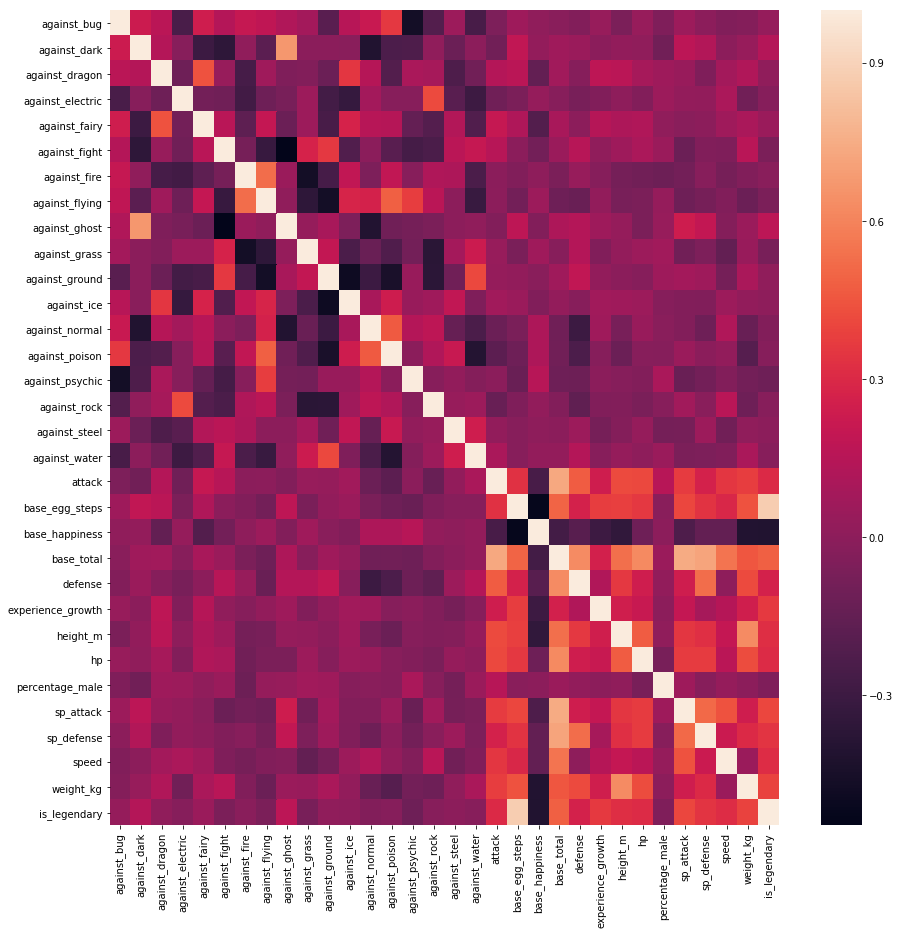

In [15]:
plt.figure(figsize=(15,15))
corr_data = data.corr()
sns.heatmap(corr_data)
pass

На тепловой карте можно увидеть, что признаки, отражающие урон от атак различного вида ("against_?") корелируют и с остальными, и между собой гораздо меньше.  
Из других признаков имеют высокую кореляцию:   
is_legendary и base_egg_steps(~80%)  
base_total и attack (~70%)  
sp_attack и base_total (~70%)   
Рассмотрим эти пары.

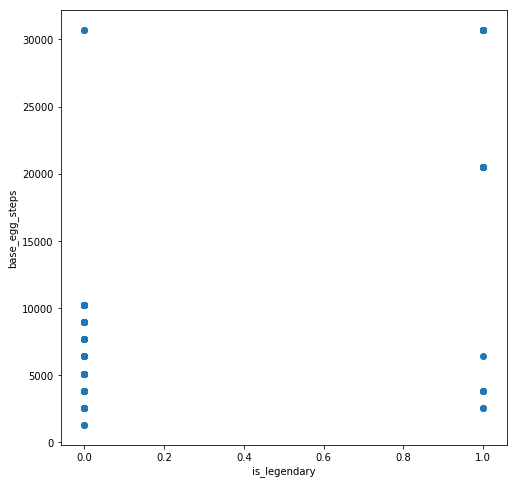

In [16]:
fig, ax = plt.subplots()
ax.scatter(data['is_legendary'], data['base_egg_steps'])
plt.xlabel('is_legendary')
plt.ylabel('base_egg_steps')
fig.set_figwidth(8)     
fig.set_figheight(8) 

В большинстве base_egg_steps (количесво шагов, необходимых для вылупления яйца) для нелегендарных покемонов не превышает 10 000. Однако существует отмека на уровне > 3 000, поэтому есть основание предположить, что это выброс.

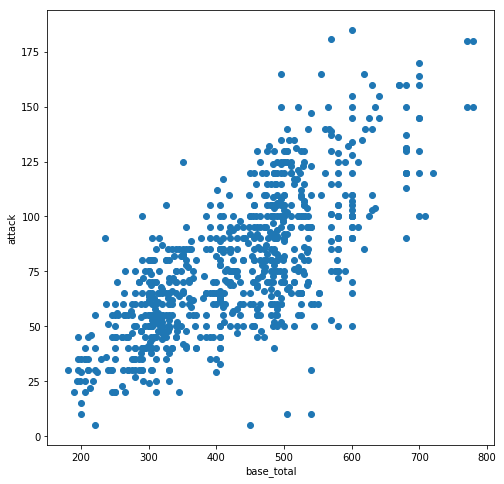

In [17]:
fig, ax = plt.subplots()
ax.scatter(data['base_total'], data['attack'])
plt.xlabel('base_total')
plt.ylabel('attack')
fig.set_figwidth(8)     
fig.set_figheight(8)

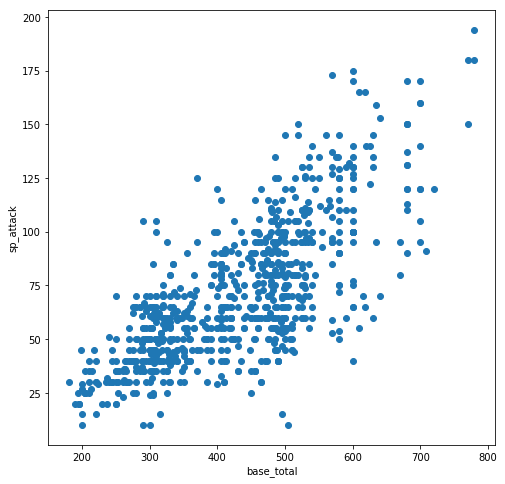

In [18]:
fig, ax = plt.subplots()
ax.scatter(data['base_total'], data['sp_attack'])
plt.xlabel('base_total')
plt.ylabel('sp_attack')
fig.set_figwidth(8)     
fig.set_figheight(8)

Базовые и особые атаки покемонов имеют похожую зависимость от защиты: чем больше урон способен нанести покемон, тем выше у него защита. 

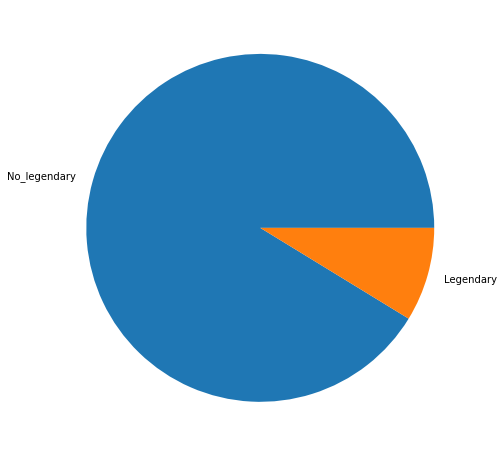

In [19]:
fig, ax = plt.subplots()
fig.set_figwidth(8)     
fig.set_figheight(8)
ax.pie(data['is_legendary'].value_counts(), labels = ["No_legendary", "Legendary"])
pass

Как видно из диаграммы, данные несбалансированы.

Рассморим категориальные признаки.

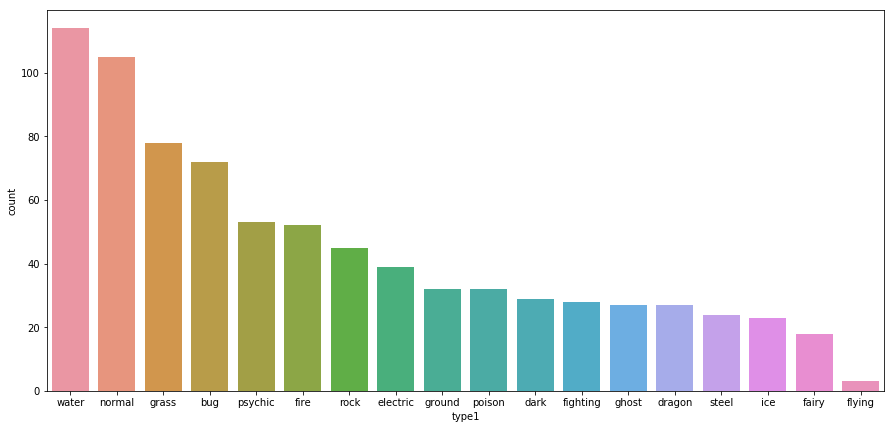

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='type1', order=data['type1'].value_counts().index, data=data)
pass

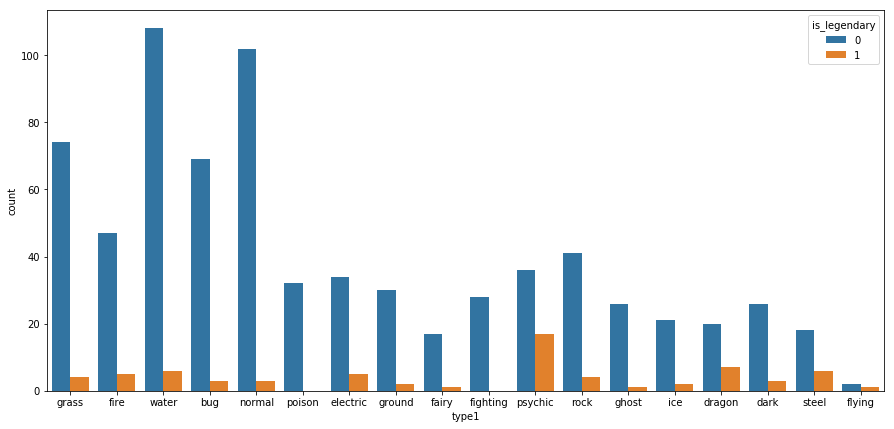

In [21]:
plt.figure(figsize=(15,7))
sns.countplot('type1',hue='is_legendary',data=data)
pass

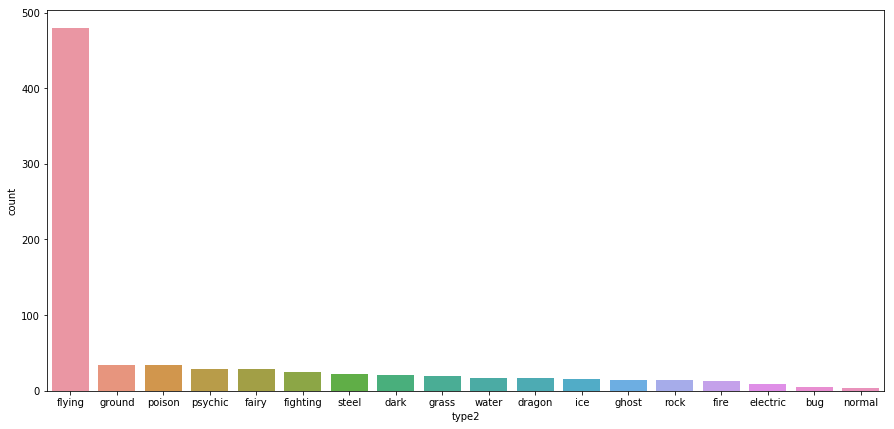

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='type2', order=data['type2'].value_counts().index, data=data)
pass

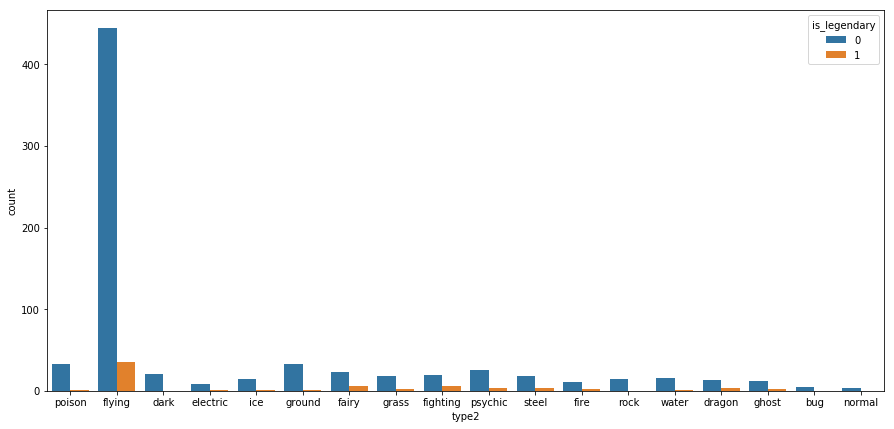

In [23]:
plt.figure(figsize=(15,7))
sns.countplot('type2',hue='is_legendary',data=data)
plt.legend(loc='upper right', title="is_legendary")
pass

Из наблюдений:   
1. срееди всех видов среди покемонов "psychic" легендарные встречаются чаще   
2. среди всех подвидов, больше всего легендарных из подвида "flying"

Рассмотрим числовые признаки.

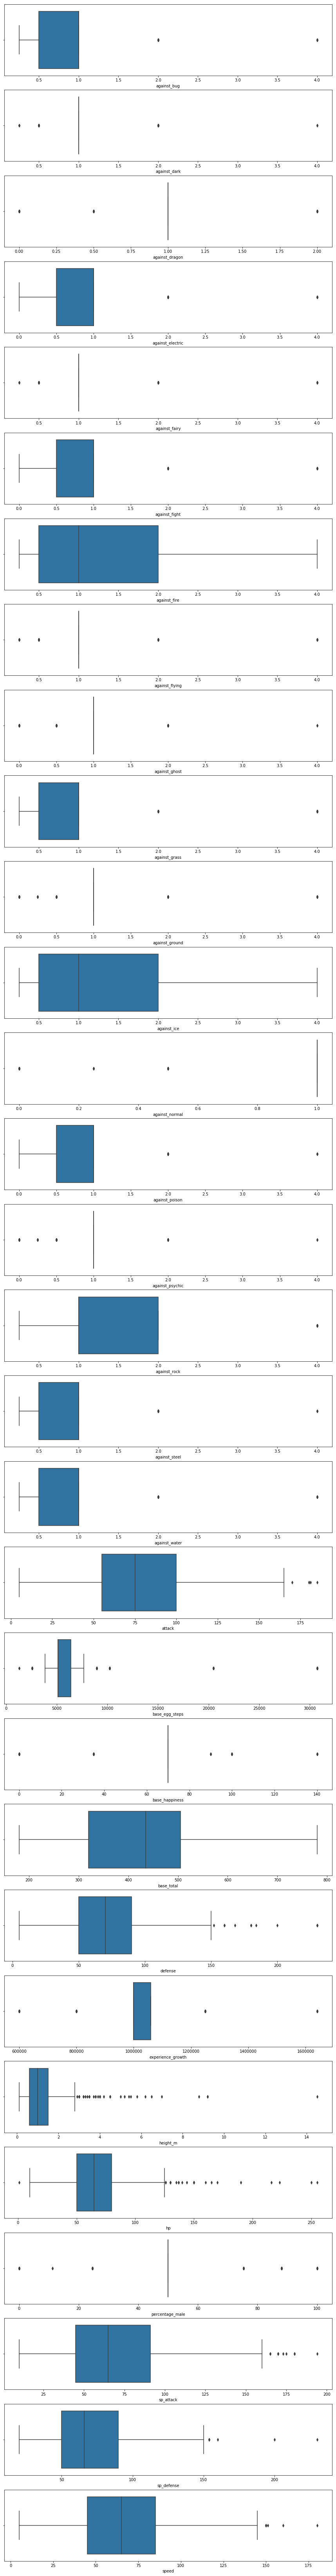

In [24]:
num_cols = [x for x in data.columns if data[x].dtype in ['int64', 'float64'] and x != 'is_legendary']
fig, axes = plt.subplots(30,1, figsize=(15,15))    
fig.set_figheight(120)
for i in range (0, 30):
    sns.boxplot(ax=axes[i], data=data, x=num_cols[i])
pass

##  Борьба с выбросами

Как видно из boxplot числовых признаков, многие из них имеют выбросы.   

In [25]:
main_data = data.copy(deep=True)
for i in range(0, 30):
    main_data[num_cols[i]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])
    rows_to_drop = main_data[(main_data[num_cols[i]] < main_data[num_cols[i]].quantile(0.005)) | (main_data[num_cols[i]] > main_data[num_cols[i]].quantile(0.995))].index
    main_data = main_data.drop(rows_to_drop)
pass

In [26]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 800
Data columns (total 34 columns):
against_bug          731 non-null float64
against_dark         731 non-null float64
against_dragon       731 non-null float64
against_electric     731 non-null float64
against_fairy        731 non-null float64
against_fight        731 non-null float64
against_fire         731 non-null float64
against_flying       731 non-null float64
against_ghost        731 non-null float64
against_grass        731 non-null float64
against_ground       731 non-null float64
against_ice          731 non-null float64
against_normal       731 non-null float64
against_poison       731 non-null float64
against_psychic      731 non-null float64
against_rock         731 non-null float64
against_steel        731 non-null float64
against_water        731 non-null float64
attack               731 non-null int64
base_egg_steps       731 non-null int64
base_happiness       731 non-null int64
base_total         

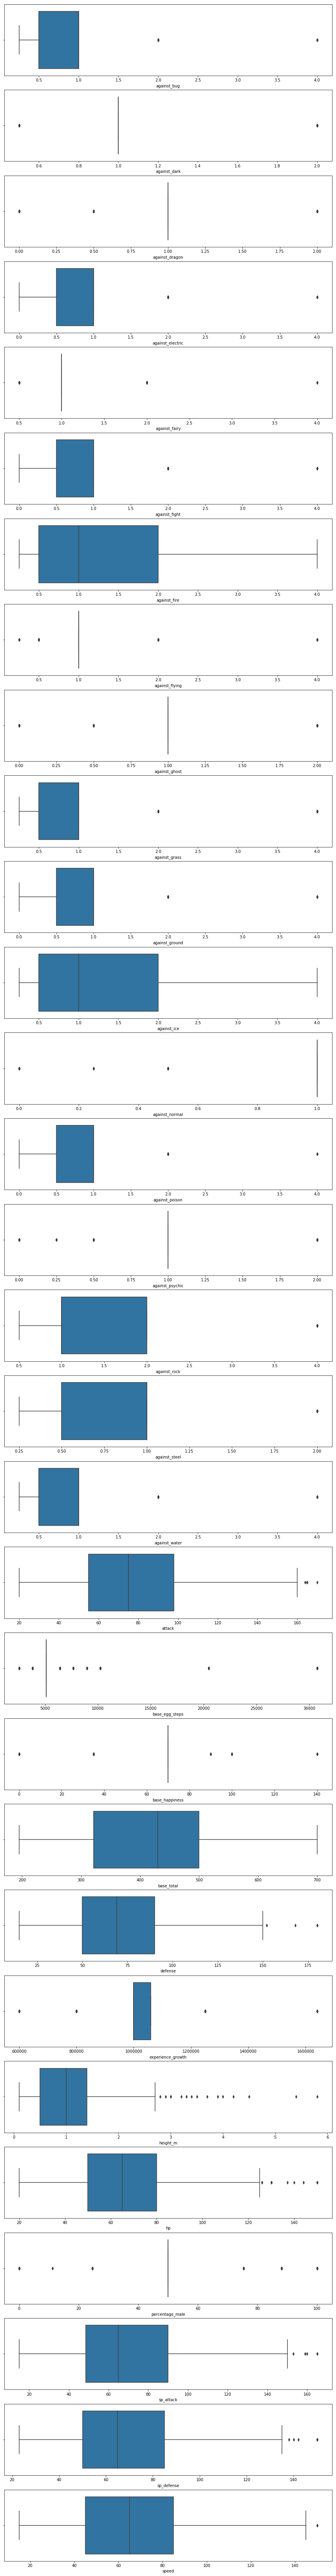

In [27]:
num_cols = [x for x in main_data.columns if main_data[x].dtype in ['int64', 'float64'] and x != 'is_legendary']
fig, axes = plt.subplots(30,1, figsize=(15,15))    
fig.set_figheight(120)
for i in range (0, 30):
    sns.boxplot(ax=axes[i], data=main_data, x=num_cols[i])
pass

На графиках видно, что количество потенциальных выбросов уменьшилось. 

# Бинаризация категориальных признаков

Категориальные признаки:   
type1   
type2   
classification   

In [28]:
department_dummies = pd.get_dummies(main_data['type1'])
main_data = pd.concat((main_data, department_dummies), axis=1)
main_data = main_data.drop(['type1'], axis=1)
department_dummies.head(10)

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
department_dummies = pd.get_dummies(main_data['type2'])
main_data = pd.concat((main_data, department_dummies), axis=1)
main_data = main_data.drop(['type2'], axis=1)
department_dummies.head(10)

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
main_data.columns = [*main_data.columns[:-18], 'bug2', 'dark2', 'dragon2', 'electric2', 'fairy2', 'fighting2', 'fire2', 'flying2', 'ghost2', 'grass2', 'ground2', 'ice2', 'normal2', 'poison2', 'psychic2', 'rock2', 'steel2', 'water2']
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 800
Data columns (total 68 columns):
against_bug          731 non-null float64
against_dark         731 non-null float64
against_dragon       731 non-null float64
against_electric     731 non-null float64
against_fairy        731 non-null float64
against_fight        731 non-null float64
against_fire         731 non-null float64
against_flying       731 non-null float64
against_ghost        731 non-null float64
against_grass        731 non-null float64
against_ground       731 non-null float64
against_ice          731 non-null float64
against_normal       731 non-null float64
against_poison       731 non-null float64
against_psychic      731 non-null float64
against_rock         731 non-null float64
against_steel        731 non-null float64
against_water        731 non-null float64
attack               731 non-null int64
base_egg_steps       731 non-null int64
base_happiness       731 non-null int64
base_total         

## Нормализация 

Так как в датасете есть признаки, диапазон измененния значений которых отличается на несколько порядков, необходимо нормализовать количественные данные.

In [31]:
main_data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,is_legendary,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,bug2,dark2,dragon2,electric2,fairy2,fighting2,fire2,flying2,ghost2,grass2,ground2,ice2,normal2,poison2,psychic2,rock2,steel2,water2
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.006840,1.056772,0.973324,1.075581,1.060192,1.046170,1.133379,1.197332,0.980164,1.028386,1.082763,1.220246,0.893639,0.994186,1.005814,1.259234,0.966484,1.045486,77.061560,6695.923393,66.326949,422.904241,71.993160,1.052658e+06,1.052120,67.300958,55.022298,70.730506,69.778386,66.039672,52.293844,0.065663,0.087551,0.035568,0.032832,0.051984,0.023256,0.035568,0.068399,0.004104,0.035568,0.102599,0.036936,0.028728,0.132695,0.038304,0.062927,0.051984,0.027360,0.143639,0.006840,0.025992,0.021888,0.012312,0.034200,0.024624,0.015048,0.608755,0.015048,0.027360,0.041040,0.015048,0.005472,0.043776,0.039672,0.016416,0.023256,0.023256
std,0.606998,0.411968,0.348637,0.654685,0.487307,0.695144,0.689074,0.598053,0.542650,0.795620,0.722313,0.740271,0.261824,0.553058,0.473493,0.693537,0.450158,0.602279,30.218071,5720.397947,17.021858,111.335844,27.744356,1.557641e+05,0.674633,21.835995,19.063627,29.819638,25.545611,27.658580,87.050995,0.247863,0.282835,0.185337,0.178318,0.222146,0.150818,0.185337,0.252603,0.063974,0.185337,0.303642,0.188733,0.167155,0.339477,0.192060,0.242999,0.222146,0.163241,0.350963,0.082477,0.159220,0.146417,0.110349,0.181866,0.155082,0.121827,0.488363,0.121827,0.163241,0.198518,0.121827,0.073821,0.204736,0.195320,0.127155,0.150818,0.150818
min,0.250000,0.500000,0.000000,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.500000,0.250000,0.250000,20.000000,2560.000000,0.000000,195.000000,15.000000,6.000000e+05,0.100000,20.000000,0.000000,15.000000,23.000000,15.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,0.500000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,321.500000,50.000000,1.000000e+06,0.500000,50.000000,50.000000,48.500000,50.000000,45.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [32]:
data_stand = (main_data - main_data.mean(axis = 0))/main_data.std(axis = 0)
data_stand.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,is_legendary,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,bug2,dark2,dragon2,electric2,fairy2,fighting2,fire2,flying2,ghost2,grass2,ground2,ice2,normal2,poison2,psychic2,rock2,steel2,water2
count,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02
mean,2.812767e-16,-7.988746e-17,5.892839e-17,1.606862e-16,9.878099e-16,-4.384128e-16,3.897171e-16,-8.049497e-17,1.740704e-16,-1.388158e-16,1.275769e-17,-9.932775e-17,5.364306e-16,1.424609e-16,1.154267e-16,6.105467e-17,-3.264982e-16,2.322204e-16,4.632257e-17,2.235634e-16,-5.710586e-17,-1.737476e-16,-2.101982e-16,3.225874e-16,6.881560e-16,6.226969e-17,7.372580e-15,3.371676e-17,-1.543073e-16,2.130364e-16,3.872871e-16,6.913454e-16,-1.603824e-16,-7.120767e-16,-5.276217e-16,1.849106e-16,-4.131062e-17,1.672928e-16,1.251469e-16,-1.913654e-16,5.322540e-16,-1.562817e-16,6.675007e-17,7.905213e-17,-1.544592e-16,-7.337951e-16,5.736405e-16,6.340877e-17,-1.008465e-16,-1.136194e-15,-2.255378e-16,1.516495e-16,-5.565543e-16,1.816832e-16,3.511403e-16,-5.585288e-16,3.830725e-16,4.131062e-17,5.278116e-16,-4.617070e-16,4.339894e-16,4.292432e-16,-1.864294e-16,-5.308111e-17,1.360061e-16,1.287919e-16,-4.826660e-16,-1.240837e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.246858e+00,-1.351492e+00,-2.791799e+00,-1.642900e+00,-1.149566e+00,-1.504968e+00,-1.281980e+00,-1.584027e+00,-1.806255e+00,-9.783383e-01,-1.499021e+00,-1.310664e+00,-3.413125e+00,-1.797615e+00,-2.124243e+00,-1.094728e+00,-1.591628e+00,-1.320793e+00,-1.888326e+00,-7.230132e-01,-3.896575e+00,-2.046998e+00,-2.054225e+00,-2.906045e+00,-1.411317e+00,-2.166192e+00,-2.886245e+00,-1.868920e+00,-1.831171e+00,-1.845347e+00,-5.995778e-01,-2.649189e-01,-3.095493e-01,-1.919088e-01,-1.841190e-01,-2.340065e-01,-1.541978e-01,-1.919088e-01,-2.707785e-01,-6.415015e-02,-1.919088e-01,-3.378948e-01,-1.957034e-01,-1.718633e-01,-3.908805e-01,-1.994362e-01,-2.

# Метод ближайшийх соседей

Разобьем данные на обучающую и тестовую выборки.

In [33]:
from sklearn.model_selection import train_test_split

y = main_data['is_legendary']
X = data_stand.drop(['is_legendary'], axis=1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
N, d = x_train.shape
N, d

(584, 67)

In [35]:
N, d = x_test.shape
N, d

(147, 67)

Обучим классификатор на обучающей выборке, выбрав для начала число соседей = 10.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
score1 = np.mean(y_train != knn.predict(x_train))
score2 = np.mean(y_test  != knn.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.06506849315068493
Ошибка на тестовой выборке:  0.061224489795918366


Попробуем еще несколько вариантов парамера n_neighbors.

In [37]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
score1 = np.mean(y_train != knn.predict(x_train))
score2 = np.mean(y_test  != knn.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.04452054794520548
Ошибка на тестовой выборке:  0.04081632653061224


In [38]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
score1 = np.mean(y_train != knn.predict(x_train))
score2 = np.mean(y_test  != knn.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.06678082191780822
Ошибка на тестовой выборке:  0.061224489795918366


Подберем оптимальный параметр для классификатора.

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 2, 3, 4, 5 , 6, 7, 8, 9, 10]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid)
knn.fit(x_train, y_train)
knn_2 = pd.DataFrame(knn.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

print("Оптимальный параметр: ", knn.best_params_)

Оптимальный параметр:  {'n_neighbors': 3}


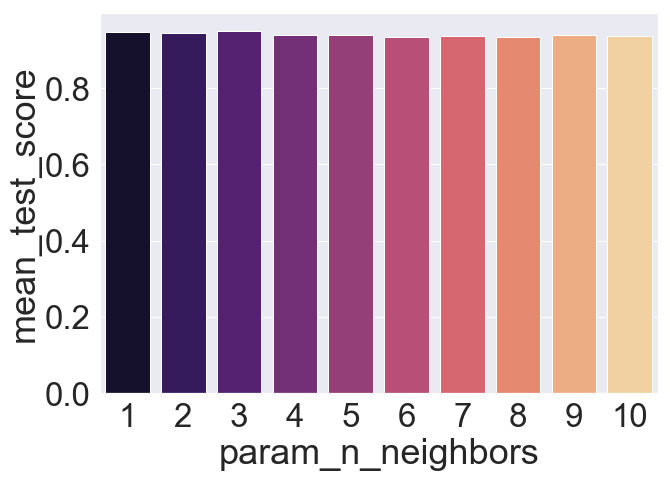

In [69]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 7)
sns.barplot(x='param_n_neighbors', y='mean_test_score', data=knn_2, palette='magma')
pass

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
score1 = np.mean(y_train != knn.predict(x_train))
score2 = np.mean(y_test  != knn.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.03595890410958904
Ошибка на тестовой выборке:  0.04081632653061224


# Случайный лес

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_train)
score1 = np.mean(y_train != model.predict(x_train))
score2 = np.mean(y_test  != model.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.006802721088435374


Подберем оптимальные параметры, а именно число деревьев и их максимальную глубину.

In [71]:
n_estimators = [100, 200, 300, 400, 600, 700, 1000]
max_depth = [1, 3, 7, 9, 13, 14, 15]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
model = GridSearchCV(RandomForestClassifier(), param_grid)
model.fit(x_train, y_train)
model_2 = pd.DataFrame(model.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

print("Оптимальный параметр: ", model.best_params_)

Оптимальный параметр:  {'max_depth': 14, 'n_estimators': 200}


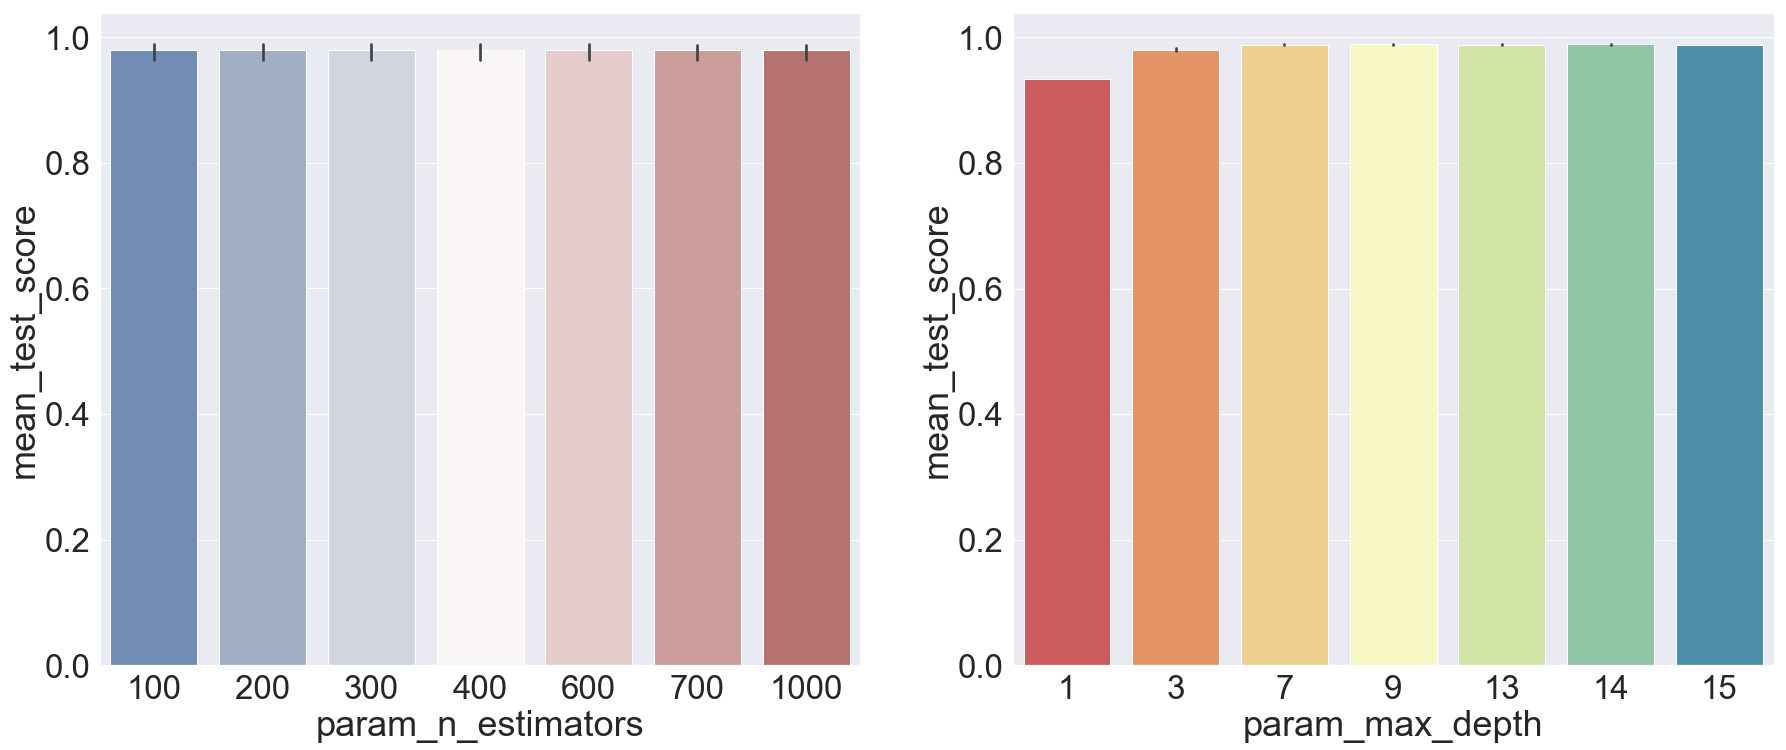

In [82]:
fig, axs = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(30, 12)
sns.barplot(data=model_2, x='param_n_estimators', y='mean_test_score',  ax=axs[0], palette='vlag')
sns.barplot(x='param_max_depth', y='mean_test_score', data=model_2, ax=axs[1], palette='Spectral')
pass

In [87]:
model = RandomForestClassifier(n_estimators = 200, max_depth = 14)
model.fit(x_train, y_train)
y_predict = model.predict(x_train)
score1 = np.mean(y_train != model.predict(x_train))
score2 = np.mean(y_test  != model.predict(x_test))
print("Ошибка на обучающей выборке: ", score1)
print("Ошибка на тестовой выборке: ", score2)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.006802721088435374


# Выводы

1. Данные датасета несбалансированы   
2. Некоторые признаки имеют высокую корреляцию:   
is_legendary и base_egg_steps(~80%)  
base_total и attack (~70%)  
sp_attack и base_total (~70%)  
3. Из двух построенных классификаторов лучше себя показал RandomForestClassifier    
4. Для обоих алгоримов были найдены оптимальные параметры:   
KNeighborsClassifier - n_neighbors = 3   
RandomForestClassifier - n_estimators = 200, max_depth = 14